#Import Libraries

In [1]:
# Importing essential libraries for data processing, image handling, and visualization
import os  # For operating system interactions like file/directory handling
import cv2  # OpenCV library for image processing
import random  # For generating random numbers or shuffling data
import numpy as np  # For numerical operations on arrays and matrices
import pandas as pd  # For data manipulation and analysis
from tqdm import tqdm  # For displaying progress bars during iterations
import matplotlib.pyplot as plt  # For creating plots and visualizations
import seaborn as sns # For enhanced data visualization with additional styling and plot types
from collections import Counter  # Import Counter from the collections module to count occurrences of elements



<h1>Main Path Configuration</h1>
  


In [2]:
data_path="/content/drive/MyDrive/cvpr_assignment1/Animals" # Directory path where the 'Animals' dataset is stored in Google Drive

## Data directory

In [3]:
sub_folder = os.listdir(data_path)  # List all subdirectories/files within the specified 'Animals' dataset directory
print(sub_folder)  # Display the list of subdirectories (animal categories) or files in the dataset


['Tiger', 'Lion', 'Jaguar', 'Cheetah', 'Leopard']


In [4]:
tiger_folder = os.path.join(data_path, sub_folder[0])  # Construct the path to the first subdirectory (e.g., 'Tiger') within the 'Animals' dataset
print(tiger_folder)  # Display the path to the 'Tiger' folder or the first animal category in the dataset


/content/drive/MyDrive/cvpr_assignment1/Animals/Tiger


In [5]:
lion_folder=os.path.join(data_path,sub_folder[1])
print(lion_folder)

/content/drive/MyDrive/cvpr_assignment1/Animals/Lion


In [6]:
jaguar_folder=os.path.join(data_path,sub_folder[2])
print(jaguar_folder)

/content/drive/MyDrive/cvpr_assignment1/Animals/Jaguar


In [7]:
cheetah_folder=os.path.join(data_path,sub_folder[3])
print(cheetah_folder)

/content/drive/MyDrive/cvpr_assignment1/Animals/Cheetah


In [8]:
leopard_folder=os.path.join(data_path,sub_folder[4])
print(leopard_folder)

/content/drive/MyDrive/cvpr_assignment1/Animals/Leopard


<h1>Explore Categories</h1>

In [9]:
for c in os.listdir(data_path):
    # Print the name of the current category
    print("Category:-> ", c)
    # Construct the full path to the current category
    path = os.path.join(data_path, c)
    print("Path:->", path)

    # Get the index of the current category in the directory listing
    class_index = os.listdir(data_path).index(c)
    print("Class index:->", class_index)


Category:->  Tiger
Path:-> /content/drive/MyDrive/cvpr_assignment1/Animals/Tiger
Class index:-> 0
Category:->  Lion
Path:-> /content/drive/MyDrive/cvpr_assignment1/Animals/Lion
Class index:-> 1
Category:->  Jaguar
Path:-> /content/drive/MyDrive/cvpr_assignment1/Animals/Jaguar
Class index:-> 2
Category:->  Cheetah
Path:-> /content/drive/MyDrive/cvpr_assignment1/Animals/Cheetah
Class index:-> 3
Category:->  Leopard
Path:-> /content/drive/MyDrive/cvpr_assignment1/Animals/Leopard
Class index:-> 4


In [10]:
tiger_img = os.listdir(tiger_folder)  # List all files (images) within the 'Tiger' folder in the dataset


In [11]:
tiger_img_1 = os.path.join(tiger_folder, tiger_img[0])  # Construct the full path to the first image file in the 'Tiger' folder
print(tiger_img_1)  # Display the path to the first image in the 'Tiger' category


/content/drive/MyDrive/cvpr_assignment1/Animals/Tiger/pexels-photo-145973.jpeg


In [12]:
read_tiger_img = cv2.imread(tiger_img_1)  # Read the first image file in the 'Tiger' folder using OpenCV
print(read_tiger_img)  # Display the pixel array of the image, or 'None' if the image failed to load


[[[ 7 21 19]
  [ 9 23 21]
  [10 23 21]
  ...
  [ 3 12  9]
  [ 3 12  9]
  [ 4 13 10]]

 [[ 7 21 19]
  [ 9 23 21]
  [11 24 22]
  ...
  [ 2 11  8]
  [ 3 12  9]
  [ 3 12  9]]

 [[ 6 23 20]
  [ 7 24 21]
  [10 24 22]
  ...
  [ 2 11  8]
  [ 2 11  8]
  [ 2 11  8]]

 ...

 [[ 0  2  0]
  [ 1  5  0]
  [ 3  7  2]
  ...
  [ 0  0  3]
  [ 0  0  3]
  [ 3  8 11]]

 [[ 0  2  0]
  [ 6 10  5]
  [ 6 10  5]
  ...
  [ 0  4  9]
  [ 0  2  7]
  [13 17 22]]

 [[ 4  8  3]
  [11 15 10]
  [ 9 13  8]
  ...
  [ 6 10 15]
  [ 2  8 13]
  [18 24 29]]]


In [13]:
print(read_tiger_img.shape)  # Display the dimensions of the image (height, width, channels) if the image was loaded successfully


(755, 500, 3)


##Actual Image

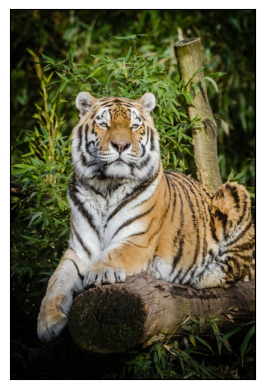

In [14]:
# Convert the BGR image to RGB format for correct color display with Matplotlib
actual_tiger_img = cv2.cvtColor(read_tiger_img, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.figure()  # Create a new figure
plt.imshow(actual_tiger_img)  # Show the image in RGB format
plt.xticks([])  # Remove x-axis ticks
plt.yticks([])  # Remove y-axis ticks
plt.show()  # Display the image


## Actual --> Gray Image


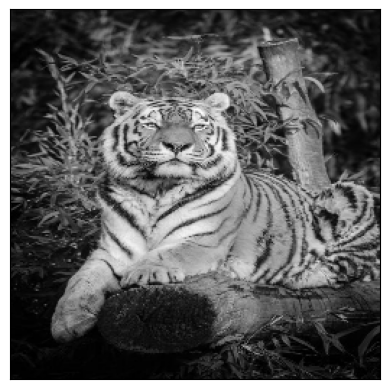

In [15]:
# Read the first image in grayscale mode
img_gray_tiger = cv2.imread(tiger_img_1, cv2.IMREAD_GRAYSCALE)

# Create a new figure
plt.figure()

# Resize the grayscale image to 256x256 pixels
img_resized = cv2.resize(img_gray_tiger, (256, 256))

# Display the resized grayscale image with a grayscale color map
plt.imshow(img_resized, cmap='gray')

# Remove x and y axis ticks for a cleaner view
plt.xticks([])
plt.yticks([])

# Show the image
plt.show()


## Prepare the trainnig Data

In [16]:
from tqdm import tqdm  # Import tqdm for the progress bar
import os
import cv2

train = []
labels = []

for animal in os.listdir(data_path):  # Iterate through the directories inside the path
    labels.append(animal)  # Add the directory name as animal name to the labels list
    animal_path = os.path.join(data_path, animal)  # Get the path of the animal's directory

    # Iterate through the images inside the animal directory with a progress bar
    for img_filename in tqdm(os.listdir(animal_path)):
        img_path = os.path.join(animal_path, img_filename)  # Get the path of the image
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
        img = cv2.resize(img, (256, 256))  # Resize the image to 256x256
        train.append([img, labels.index(animal)])  # Create a list of image and its label

print("\n*****************")
print("Total images:", len(train))
print("*****************")


100%|██████████| 31/31 [00:00<00:00, 42.65it/s]


*****************
Total images: 170
*****************


##Shuffle the data

In [17]:
random.shuffle(train)

## Data After Shuffling

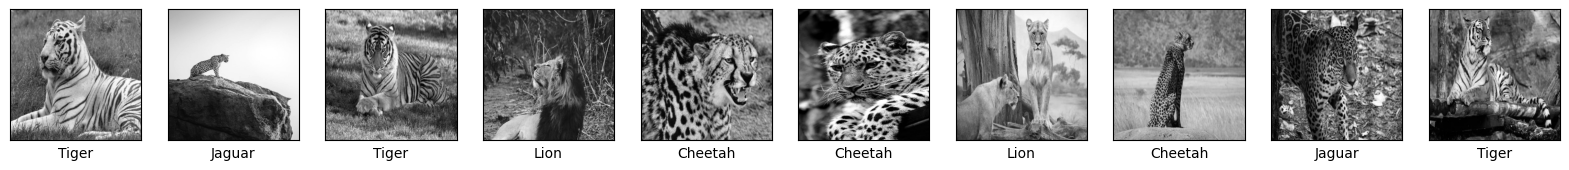

In [18]:
plt.figure(figsize=(20, 3))  # Set a wide figure size to display 10 images side-by-side

# Loop through the first 10 images in the 'train' dataset
for i in range(10):
    plt.subplot(1, 10, i + 1)  # Create a 1x10 grid of subplots and select the ith subplot
    plt.imshow(train[i][0], cmap='gray')  # Display the image in grayscale

    # Set the label for each image using the 'labels' list and the class index in 'train'
    plt.xlabel(labels[train[i][1]])

    # Remove x and y axis ticks for a cleaner display
    plt.xticks([])
    plt.yticks([])

plt.show()  # Display all 10 images in the figure


##Calculate Fold Size

In [19]:
fold_size = len(train) // 5  # Calculate the size of each fold by dividing the dataset into 5 equal parts
print(fold_size)  # Display the number of samples in each fold


34


##Fold Of the dataset

In [20]:
# Create 5 folds using list comprehension
# Each fold is a slice of the training data
folds = [train[i * fold_size:(i + 1) * fold_size] for i in range(5)]

# Iterate over each fold to print its size
for i, fold in enumerate(folds):
    print(f"Fold {i+1} has {len(fold)} images")

Fold 1 has 34 images
Fold 2 has 34 images
Fold 3 has 34 images
Fold 4 has 34 images
Fold 5 has 34 images


##Implementation fo KNN and Calculation of Accuracy And Avgerage Accuracy For the Each fold

In [21]:
import numpy as np
from collections import Counter

# Define the Euclidean distance function
def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

def knn(train_data, k_values):
    # Ensure `train_data` is a NumPy array
    train_data = np.array(train_data, dtype=object)  # Use dtype=object for mixed data types (features and label)

    all_accuracies = {}  # Dictionary to store fold accuracies for each k

    for k in k_values:
        folds = np.array_split(train_data, 5)  # Split data into 5 folds
        fold_accuracies = []

        # Cross-validation
        for i in range(5):
            # Use the i-th fold as the validation set
            validation_set = folds[i]

            # Use the remaining folds as the training set
            training_set = np.concatenate([folds[j] for j in range(5) if j != i])

            correct_predictions = 0

            for v in validation_set:
                distances = []
                for t in training_set:
                    # Calculate Euclidean distance
                    d = euclidean_distance(t[0], v[0])
                    distances.append([d, t[1]])  # Store distance and label

                distances.sort()  # Sort based on distance

                # Get labels of k nearest neighbors
                k_nearest_labels = [distances[j][1] for j in range(k)]

                # Determine the most common label
                label_counts = Counter(k_nearest_labels)
                most_common_label = max(label_counts, key=label_counts.get)

                if most_common_label == v[1]:  # Compare with true label
                    correct_predictions += 1

            # Calculate accuracy for this fold
            accuracy = correct_predictions / len(validation_set)
            fold_accuracies.append(accuracy)

        # Print accuracies for each fold for the current k
        print(f"K = {k}:")
        for fold_idx, fold_accuracy in enumerate(fold_accuracies, 1):
            print(f"  Fold {fold_idx}: Accuracy = {fold_accuracy:.2f}")

        # Calculate and print the average accuracy across the 5 folds
        mean_accuracy = np.mean(fold_accuracies)
        print(f"  ----------------------------")
        print(f"  Average Accuracy = {mean_accuracy:.2f}")
        print(f"  ----------------------------\n")

        # Store the fold accuracies in the dictionary for this k
        all_accuracies[k] = fold_accuracies

    return all_accuracies

# Assuming `train` is a dataset where each element is [features, label]
k_values = range(1, 31)  # Example range of k values for demonstration
euclidean_accuracies = knn(train, k_values)


K = 1:
  Fold 1: Accuracy = 0.29
  Fold 2: Accuracy = 0.35
  Fold 3: Accuracy = 0.35
  Fold 4: Accuracy = 0.35
  Fold 5: Accuracy = 0.18
  ----------------------------
  Average Accuracy = 0.31
  ----------------------------

K = 2:
  Fold 1: Accuracy = 0.29
  Fold 2: Accuracy = 0.35
  Fold 3: Accuracy = 0.35
  Fold 4: Accuracy = 0.35
  Fold 5: Accuracy = 0.18
  ----------------------------
  Average Accuracy = 0.31
  ----------------------------

K = 3:
  Fold 1: Accuracy = 0.29
  Fold 2: Accuracy = 0.41
  Fold 3: Accuracy = 0.26
  Fold 4: Accuracy = 0.41
  Fold 5: Accuracy = 0.24
  ----------------------------
  Average Accuracy = 0.32
  ----------------------------

K = 4:
  Fold 1: Accuracy = 0.41
  Fold 2: Accuracy = 0.35
  Fold 3: Accuracy = 0.32
  Fold 4: Accuracy = 0.38
  Fold 5: Accuracy = 0.21
  ----------------------------
  Average Accuracy = 0.34
  ----------------------------

K = 5:
  Fold 1: Accuracy = 0.32
  Fold 2: Accuracy = 0.44
  Fold 3: Accuracy = 0.32
  Fold 4: A

#Visualize of  the Results


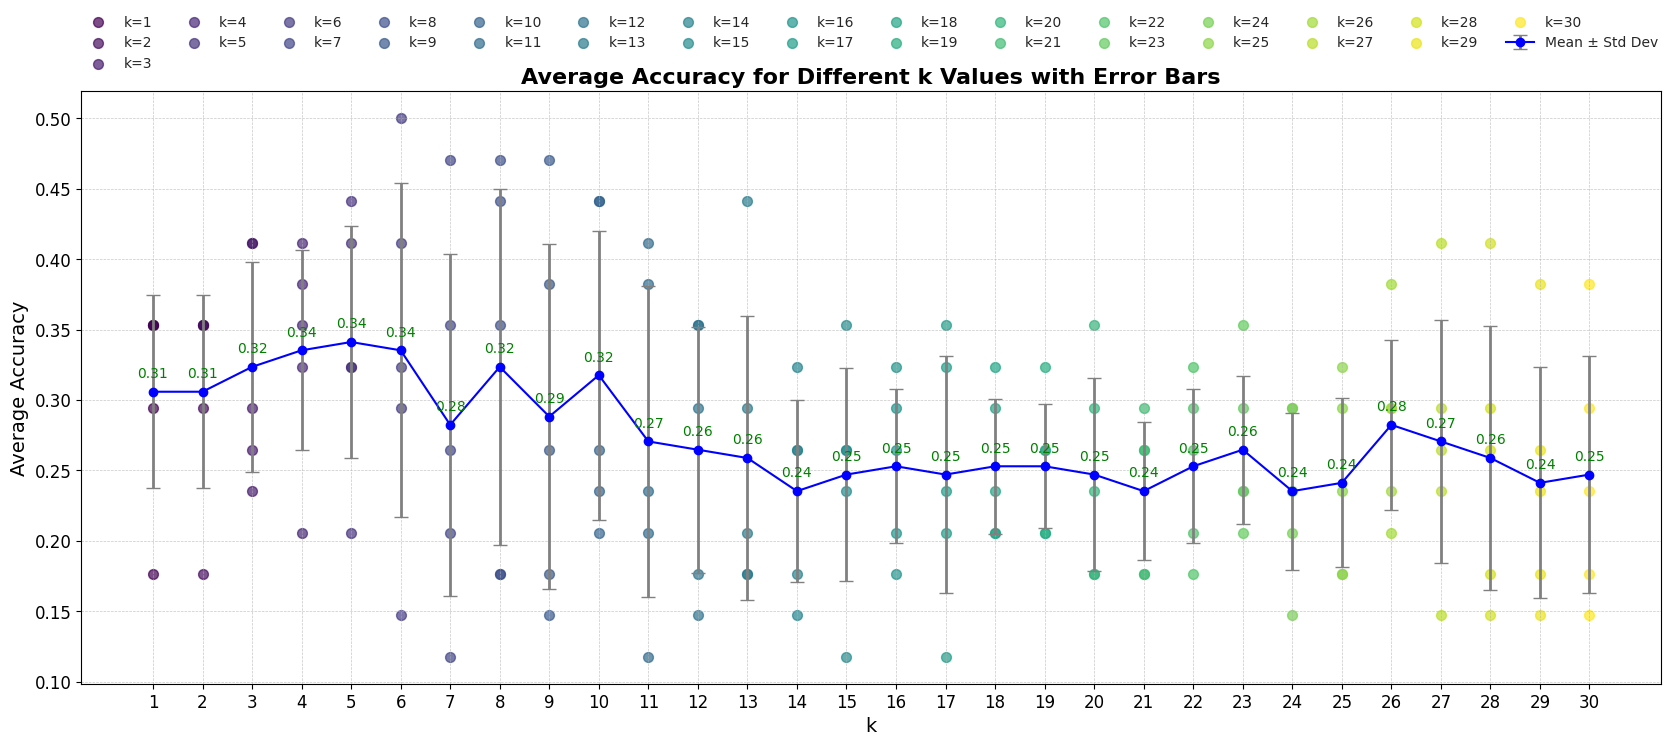

In [22]:
def plot_accuracies(euclidean_accuracies, k_values):
    plt.figure(figsize=(18, 8))
    colors = plt.cm.viridis(np.linspace(0, 1, len(k_values)))  # Color map for k values

    euclidean_mean_accuracies = []
    euclidean_std_accuracies = []

    # Loop over accuracies for each k
    for (k, fold_accuracies), color in zip(euclidean_accuracies.items(), colors):
        # Plot individual fold accuracies with varied colors
        plt.scatter([k] * len(fold_accuracies), fold_accuracies, color=color, alpha=0.7, s=50, label=f'k={k}')

        # Calculate mean and standard deviation for each k
        mean_acc = np.mean(fold_accuracies)
        std_acc = np.std(fold_accuracies)

        # Append to lists for error bar plotting
        euclidean_mean_accuracies.append(mean_acc)
        euclidean_std_accuracies.append(std_acc)

    # Plot mean accuracies with error bars
    plt.errorbar(k_values, euclidean_mean_accuracies, yerr=euclidean_std_accuracies, fmt='o-', color='blue',
                 ecolor='gray', elinewidth=2, capsize=5, label='Mean ± Std Dev')

    # Add text labels for each mean accuracy point
    for k, mean_acc in zip(k_values, euclidean_mean_accuracies):
        plt.text(k, mean_acc + 0.01, f'{mean_acc:.2f}', ha='center', fontsize=10, color='green')

    # Seaborn styling for improved aesthetics
    sns.set_style('darkgrid')
    plt.title('Average Accuracy for Different k Values with Error Bars', fontsize=16, fontweight='bold')
    plt.xlabel('k', fontsize=14)
    plt.ylabel('Average Accuracy', fontsize=14)
    plt.xticks(k_values, fontsize=12)
    plt.yticks(fontsize=12)

    # Move legend to top
    plt.legend(fontsize=10, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=len(k_values) // 2, frameon=False)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Ensure layout is adjusted
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
k_values = range(1, 31)
plot_accuracies(euclidean_accuracies, k_values)


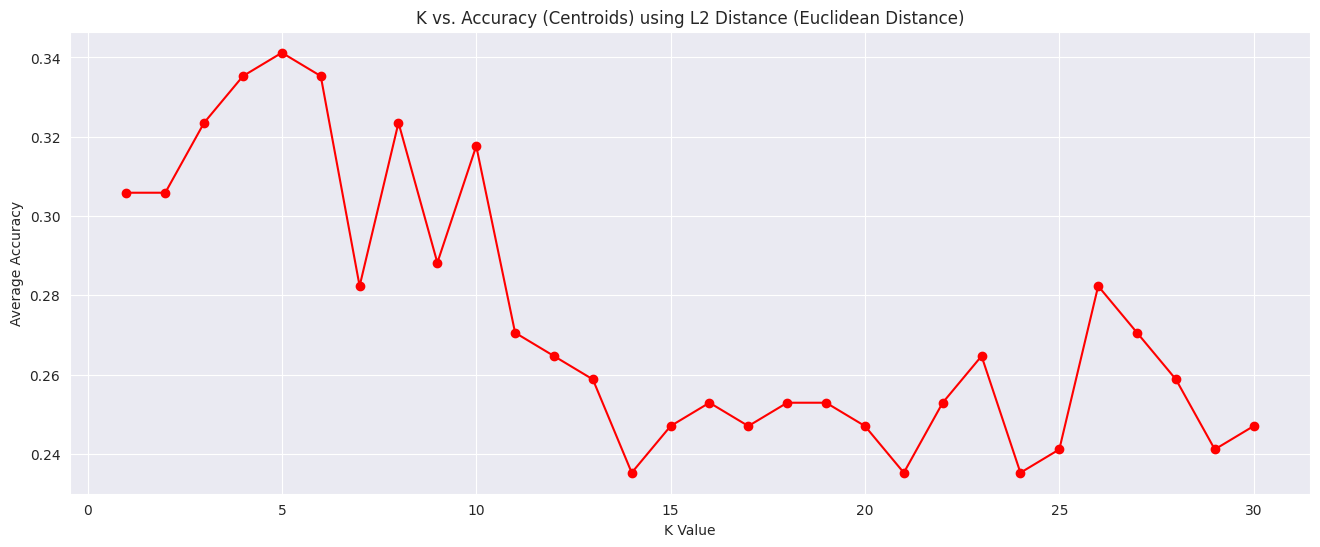

In [23]:
# Calculate the average accuracy for each K value
average_accuracies = {k: np.mean(acc) for k, acc in euclidean_accuracies.items()}

plt.figure(figsize=(16, 6))  # Set the figure size for the plot

# Plot the average accuracy for each K value
plt.plot(
    list(average_accuracies.keys()),  # X-axis: K values
    list(average_accuracies.values()),  # Y-axis: Average accuracies for each K
    marker='o',  # Marker type to plot each point
    linestyle='-',  # Line style (solid line)
    color='red',  # Line color
    markersize=6,  # Size of the markers
    markerfacecolor='red'  # Color of the markers
)

# Add labels and title
plt.xlabel('K Value')  # X-axis label
plt.ylabel('Average Accuracy')  # Y-axis label
plt.title('K vs. Accuracy (Centroids) using L2 Distance (Euclidean Distance)')  # Plot title

# Enable the grid for better visualization
plt.grid(True)

# Display the plot
plt.show()
